In [132]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key

In [133]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [134]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [135]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [136]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [137]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [138]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pingzhuang
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | buariki
City not found. Skipping...
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | temaraia
City not found. Skipping...
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | andenes
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | itaqui
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | punta arenas
Proces

Processing Record 36 of Set 4 | maningrida
Processing Record 37 of Set 4 | chimbote
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | svetlyy
Processing Record 40 of Set 4 | victoria
Processing Record 41 of Set 4 | gerede
Processing Record 42 of Set 4 | buala
Processing Record 43 of Set 4 | yangmei
Processing Record 44 of Set 4 | kampot
Processing Record 45 of Set 4 | phek
Processing Record 46 of Set 4 | george town
Processing Record 47 of Set 4 | girona
Processing Record 48 of Set 4 | mabaruma
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | south lake tahoe
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | pauini
Processing Record 4 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 5 | vila franca do campo
Processing Record 6 of Set 5 | hobyo
Processing Record 7 of Set 5 | kudahuvadhoo
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 |

Processing Record 22 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 23 of Set 8 | strzelce krajenskie
Processing Record 24 of Set 8 | camacha
Processing Record 25 of Set 8 | ubinskoye
Processing Record 26 of Set 8 | lasa
Processing Record 27 of Set 8 | abu dhabi
Processing Record 28 of Set 8 | ejido
Processing Record 29 of Set 8 | fort nelson
Processing Record 30 of Set 8 | shenjiamen
Processing Record 31 of Set 8 | sumbe
Processing Record 32 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 33 of Set 8 | carbonia
Processing Record 34 of Set 8 | kangaatsiaq
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | ust-maya
Processing Record 37 of Set 8 | rapid city
Processing Record 38 of Set 8 | argir
Processing Record 39 of Set 8 | nortelandia
Processing Record 40 of Set 8 | sistranda
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | cape canaveral
Processing Record 44 

Processing Record 9 of Set 12 | yenagoa
Processing Record 10 of Set 12 | sehithwa
Processing Record 11 of Set 12 | radom
Processing Record 12 of Set 12 | vilhena
Processing Record 13 of Set 12 | quelimane
Processing Record 14 of Set 12 | mandera
Processing Record 15 of Set 12 | hangu
Processing Record 16 of Set 12 | isangel
Processing Record 17 of Set 12 | acarau
Processing Record 18 of Set 12 | abnub
Processing Record 19 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 20 of Set 12 | shkotovo-22
City not found. Skipping...
Processing Record 21 of Set 12 | tlahualilo
City not found. Skipping...
Processing Record 22 of Set 12 | ewa beach
Processing Record 23 of Set 12 | wajir
Processing Record 24 of Set 12 | yanan
City not found. Skipping...
Processing Record 25 of Set 12 | ugoofaaru
Processing Record 26 of Set 12 | storforshei
Processing Record 27 of Set 12 | hvolsvollur
Processing Record 28 of Set 12 | omboue
Processing Record 29 of Set 12 | mago
Processing Record 30 

In [139]:
len(city_data)

575

In [140]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pingzhuang,42.0372,119.2889,55.65,35,7,15.61,CN,2021-03-04 05:24:37
1,Puerto Ayora,-0.7393,-90.3518,75.99,95,87,1.57,EC,2021-03-04 05:24:37
2,Barrow,71.2906,-156.7887,-18.40,69,1,5.75,US,2021-03-04 05:24:39
3,Jamestown,42.0970,-79.2353,34.00,98,90,5.93,US,2021-03-04 05:24:19
4,Hobart,-42.8794,147.3294,69.01,32,0,19.57,AU,2021-03-04 05:24:07
5,Albany,42.6001,-73.9662,35.60,69,90,11.50,US,2021-03-04 05:21:42
6,Hasaki,35.7333,140.8333,55.99,66,75,10.36,JP,2021-03-04 05:24:40
7,Hilo,19.7297,-155.0900,71.60,68,1,3.44,US,2021-03-04 05:24:40
8,New Norfolk,-42.7826,147.0587,69.01,44,51,5.99,AU,2021-03-04 05:24:40
9,Andenes,69.3143,16.1194,30.20,55,75,17.27,NO,2021-03-04 05:24:40


In [141]:
# Reorder the columns
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pingzhuang,CN,2021-03-04 05:24:37,42.0372,119.2889,55.65,35,7,15.61
1,Puerto Ayora,EC,2021-03-04 05:24:37,-0.7393,-90.3518,75.99,95,87,1.57
2,Barrow,US,2021-03-04 05:24:39,71.2906,-156.7887,-18.40,69,1,5.75
3,Jamestown,US,2021-03-04 05:24:19,42.0970,-79.2353,34.00,98,90,5.93
4,Hobart,AU,2021-03-04 05:24:07,-42.8794,147.3294,69.01,32,0,19.57
5,Albany,US,2021-03-04 05:21:42,42.6001,-73.9662,35.60,69,90,11.50
6,Hasaki,JP,2021-03-04 05:24:40,35.7333,140.8333,55.99,66,75,10.36
7,Hilo,US,2021-03-04 05:24:40,19.7297,-155.0900,71.60,68,1,3.44
8,New Norfolk,AU,2021-03-04 05:24:40,-42.7826,147.0587,69.01,44,51,5.99
9,Andenes,NO,2021-03-04 05:24:40,69.3143,16.1194,30.20,55,75,17.27


In [142]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [143]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

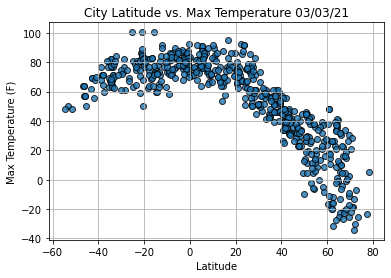

In [144]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

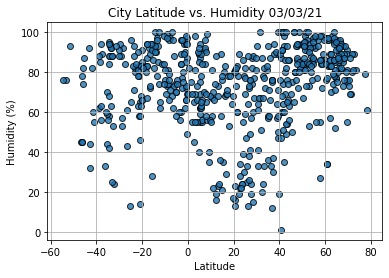

In [145]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

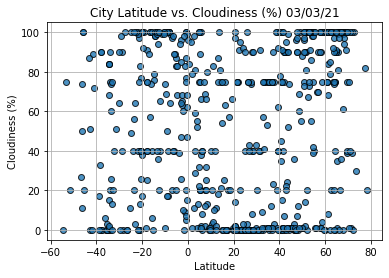

In [146]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

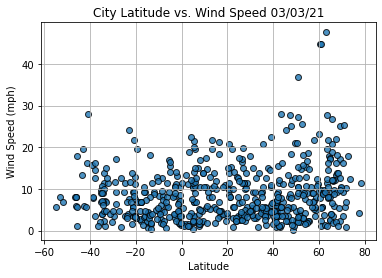

In [147]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [148]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r = r_value
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r:.2f}")

In [149]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

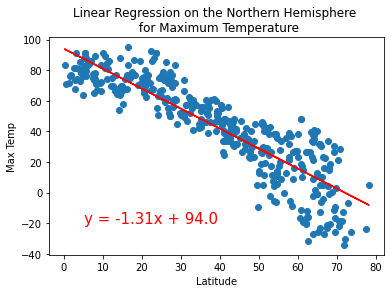

The r-value is -0.89


In [150]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-20))

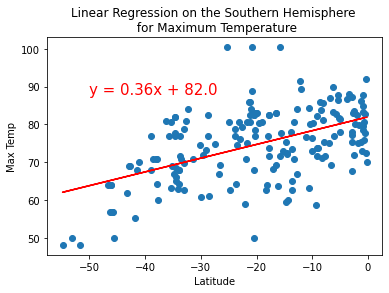

The r-value is 0.52


In [151]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,88))

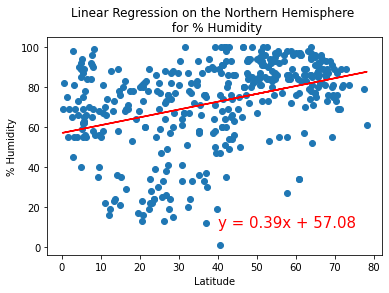

The r-value is 0.38


In [152]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

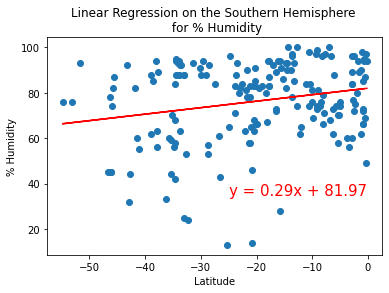

The r-value is 0.22


In [158]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,35))

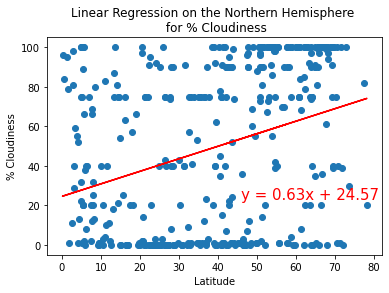

The r-value is 0.33


In [157]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(46,23))

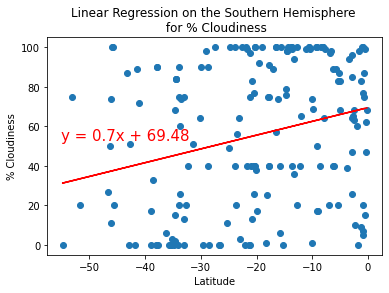

The r-value is 0.26


In [159]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,53))

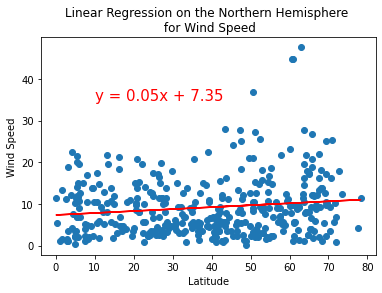

The r-value is 0.14


In [162]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,35))

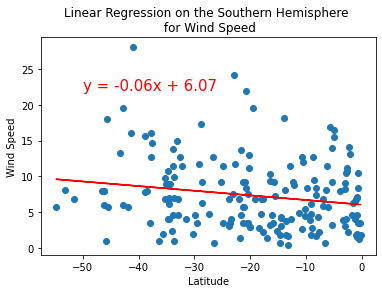

The r-value is -0.18


In [167]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,22))